# Prosper Loan Data Exploration
## by Deepti Khona

## Preliminary Wrangling

> This document explores a dataset containing borrowers loan data and attributes for approximately 11,4000 listings

In [56]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [57]:
#> Load in your dataset and describe its properties through the questions below.
df=pd.read_csv('prosperLoanData.csv')

In [58]:
# high-level overview of data shape and composition
print(df.shape)

(113937, 81)


In [59]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [60]:
df.rename(columns={'ProsperRating (numeric)' : 'ProsperRating_num'}, inplace=True)

In [61]:
df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory_num'}, inplace=True)

In [62]:
df.rename(columns={'ProsperRating (Alpha)' : 'ProsperRating_alpha'}, inplace=True) 

In [63]:
df.rename(columns={'TradesNeverDelinquent (percentage)' : 'TradesNeverDelinquent_percentage'}, inplace=True)  

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [65]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_num,ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [66]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

## Univariate Exploration

Here we investigate 5 variables that we think affect borrowers loan

# 1.  Borrowers Rate

In [67]:
(df.BorrowerRate.max()), df.BorrowerRate.min()

(0.4975, 0.0)

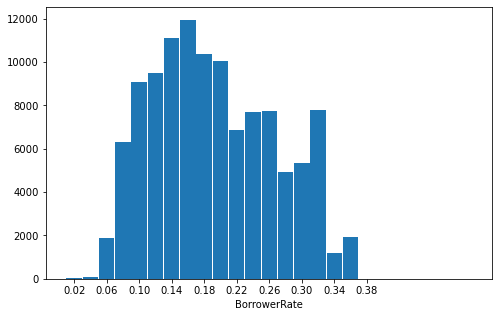

In [68]:
binsize = 0.02
bins = np.arange(0.01, df['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', rwidth=0.95, bins=bins, histtype='bar')
plt.xticks([0.02,0.06,0.10, 0.14, 0.18, 0.22, 0.26, 0.30, 0.34, 0.38])
plt.xlabel('BorrowerRate')
plt.show()

The borrowers rate shows that maximum number of borrowers received a rate of 0.14-0.16. Here we see there are some outliers for interest rate below 0.04 and above 0.36. These will be removed below. After removal we will rechart the data.

In [69]:
df= df[~(df['BorrowerRate'] < 0.04)]

In [70]:
df= df[~(df['BorrowerRate'] > 0.36)]

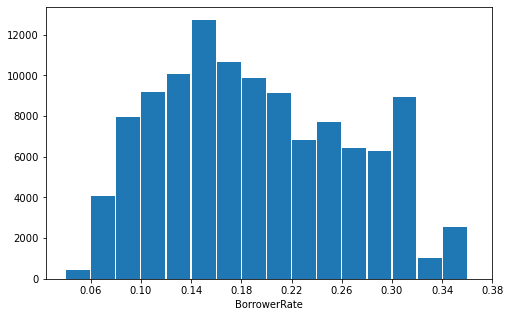

In [71]:
binsize = 0.02
bins = np.arange(0.04, df['BorrowerRate'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', rwidth=0.95, bins=bins, histtype='bar')
plt.xticks([0.06,0.10, 0.14, 0.18, 0.22, 0.26, 0.30, 0.34, 0.38])
plt.xlabel('BorrowerRate')
plt.show()

# 2. CreditScoreRangeLower

In [72]:
df.CreditScoreRangeLower.value_counts()

680.0    16490
660.0    16363
700.0    15469
720.0    12921
640.0    12197
740.0     9267
760.0     6606
780.0     4623
620.0     4168
600.0     3598
800.0     2643
520.0     1588
540.0     1471
820.0     1409
560.0     1357
580.0     1122
840.0      566
500.0      552
480.0      344
860.0      212
460.0      141
0.0        133
440.0       36
880.0       27
420.0        5
360.0        1
Name: CreditScoreRangeLower, dtype: int64

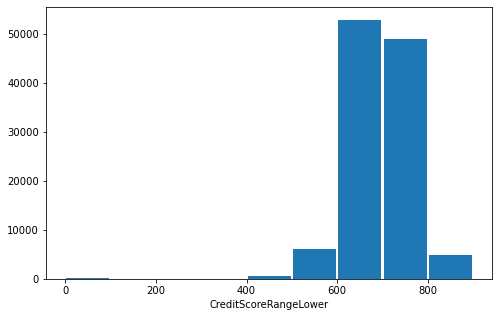

In [73]:
# start with a standard-scaled plot for ProsperRating
binsize = 100
bins = np.arange(0, df['CreditScoreRangeLower'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'CreditScoreRangeLower', rwidth=0.95, bins=bins, histtype='bar')
plt.xlabel('CreditScoreRangeLower')
plt.show()

Largest loans are given to people with 600-800 credit score rating. Here we see that the 0 bin size may not be useful, as these are credit scores that are probably unavailable. 

In [74]:
low_outliers = (df['CreditScoreRangeLower'] < 400)

In [75]:
df= df[~(df['CreditScoreRangeLower'] < 400)]

In [76]:
df.CreditScoreRangeLower.value_counts()

680.0    16490
660.0    16363
700.0    15469
720.0    12921
640.0    12197
740.0     9267
760.0     6606
780.0     4623
620.0     4168
600.0     3598
800.0     2643
520.0     1588
540.0     1471
820.0     1409
560.0     1357
580.0     1122
840.0      566
500.0      552
480.0      344
860.0      212
460.0      141
440.0       36
880.0       27
420.0        5
Name: CreditScoreRangeLower, dtype: int64

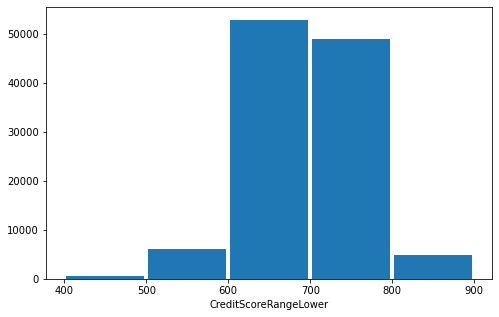

In [77]:
# start with a standard-scaled plot for ProsperRating
binsize = 100
bins = np.arange(400, df['CreditScoreRangeLower'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'CreditScoreRangeLower', rwidth=0.95, bins=bins, histtype='bar')
plt.xlabel('CreditScoreRangeLower')
plt.show()

Dropping rows with 0 creditscore (due to unavailability), helps us better evaluate Credit Score data. It shows that max number of borrowers have credit score of 600 to 700.

# 3. EmploymentStatus


In [78]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26334
Self-employed     6131
Not available     5238
Other             3806
Part-time         1086
Not employed       834
Retired            795
Name: EmploymentStatus, dtype: int64

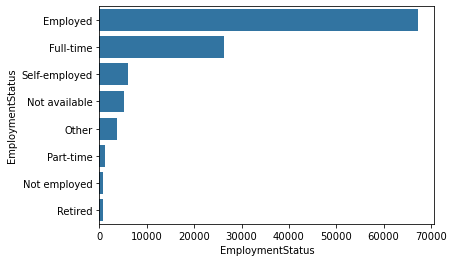

In [79]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other', 'Part-time', 'Not employed', 'Retired']}
base_color = sb.color_palette()[0]
type_order=df['EmploymentStatus'].value_counts().index


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

sb.countplot(data=df, y='EmploymentStatus', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xlabel('EmploymentStatus');
 


This shows that Employed people have the largest loans, followed by full-time and self-employed. However Part-time, not employed, and retired have the lowest number of loans

# 4. LoanCurrentDaysDelinquent

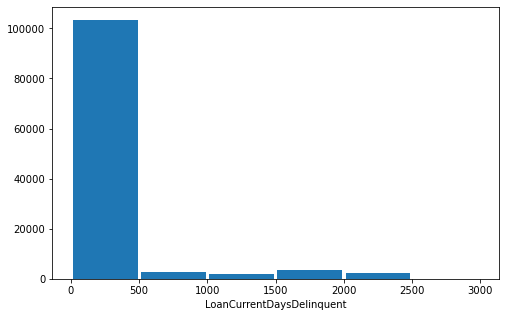

In [80]:
# start with a standard-scaled plot for ProsperRating
binsize = 500
bins = np.arange(0, df['LoanCurrentDaysDelinquent'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanCurrentDaysDelinquent', rwidth=0.95, bins=bins)
plt.xlabel('LoanCurrentDaysDelinquent')
plt.show()

The chart shows that there is a right skew and the max number of days of delinquent loans are for less than 500 days. However a log scale data will help us evaluate the distribution better.

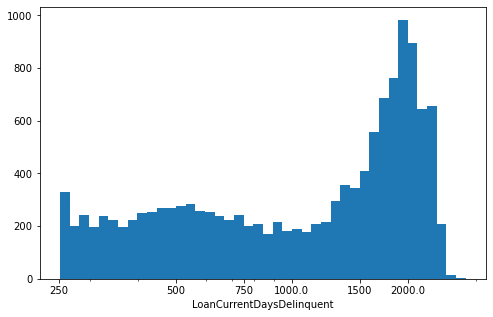

In [81]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['LoanCurrentDaysDelinquent'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.xscale('log')
plt.xticks([250, 500, 750, 1e3, 1500, 2e3], [250, 500, 750, 1e3, 1500, 2e3])
plt.xlabel('LoanCurrentDaysDelinquent')
plt.show()

This log scale plot shows a multimodal chart for LoanCurrentDaysDelinquent, with the max borrowers were about 2000 days deliquent, and another at 250 and 500 days deliquent.

# 5. ListingCategory_num

In [82]:
df['ListingCategory_num'].value_counts()

1     58304
0     16795
7     10493
2      7433
3      7188
6      2572
4      2392
13     1996
15     1522
18      885
14      876
20      771
19      768
5       754
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory_num, dtype: int64

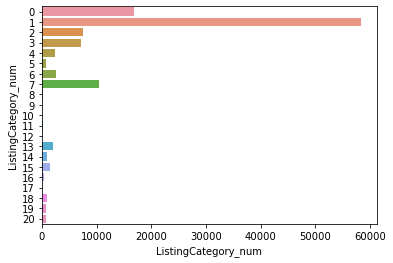

In [83]:
# convert cut, color, and clarity into ordered categorical types
sb.countplot(data=df, y='ListingCategory_num');
# Change the tick locations and labels
plt.xlabel('ListingCategory_num');

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

This histogram of Listing Category_num shows that ListingCategory_num of 1=Debt Consolidation, was the most common reason for loans. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The LoanCurrentDaysDelinquent variable took a large range of values, so I explored the data using log transform. Under the transformation, the data showed various peaks. The max peak was for borrowers at about 2000 days, and another at 250 and 500 days deliquent.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, I dropped outliers of creditscore that were 0, as this meant that we did not have information on these borrowers. Dropping this data will help us focus on the range of creditscore for our evaluation. Also for the borrowers rate, we dropped outliers less than 0.04 and above 0.36

## Bivariate Exploration

In [84]:
#CreditScoreRangeLower-  better employment, less delinquent, lower interest rate, higher creditscorerangelower
#2. EmploymentStatus-  better employment, less delinquent, lower interest rate, higher creditscorerangelower
#3. ListingCategory - Type of loan- affects interest rate
#4. Interest rate- higher rating, lower interest rate, better employment status better interest rate

categoric_vars = ['EmploymentStatus', 'ListingCategory_num']
numeric_vars= ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']

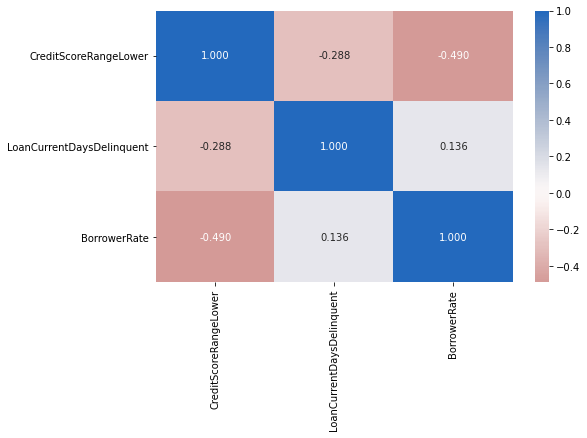

In [85]:
# correlation plot between all the numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

This correlation coefficient chart shows a moderate negative linear relationship between Borrower Rate and CreditScore. The correlation coeffecient of 0.288 between LoanCurrentDays Delinquent and creditscore shows a weak negative relationship between the two. There was not much relationship established between borrower rate and loan currentdays delinquent.

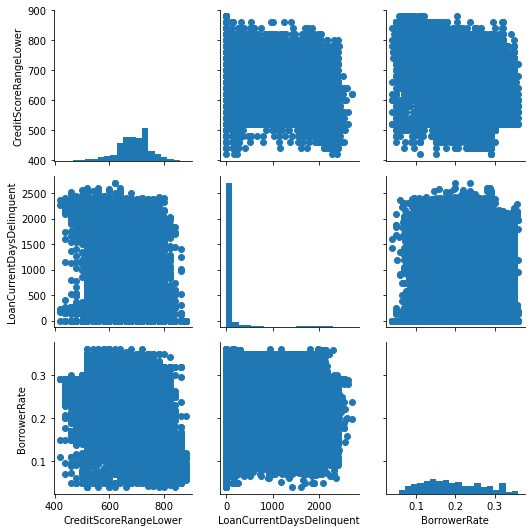

In [86]:
# scatter plot matrix for all nimeric variables:
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

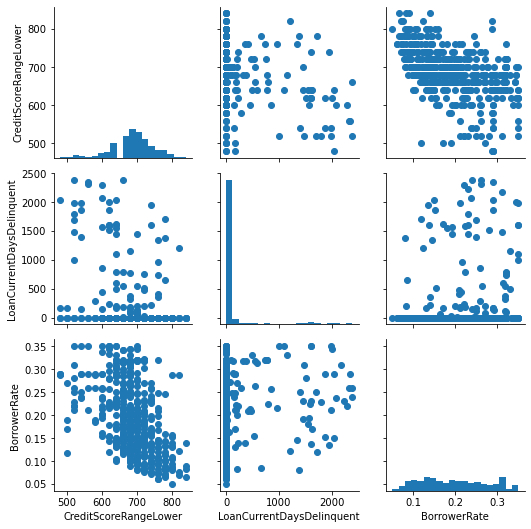

In [87]:
# scatterplot matrix: sample 500 borrowers so that plots are clearer and
# they render faster
categoric_vars = ['EmploymentStatus', 'ListingCategory_num']
numeric_vars= ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']

samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.sample(500, random_state=42)

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

This scatter plot matrix chart shows a moderate negative linear relationship between Borrower Rate and CreditScore. The relationship between LoanCurrentDays Delinquent and creditscore shows a weak negative relationship between the two. There was not much relationship established between borrower rate and loan currentdays delinquent.

C:\Users\dkona\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\dkona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dkona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dkona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, 

<Figure size 720x720 with 0 Axes>

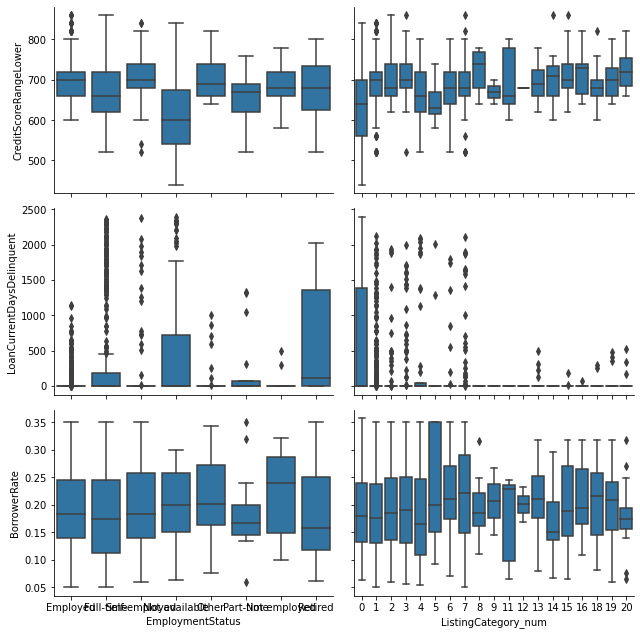

In [88]:
categoric_vars = ['EmploymentStatus', 'ListingCategory_num']
numeric_vars= ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']

samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.sample(2000, random_state=42)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Comparing the employment status against the 3 numeric variables shows that variability of the borrower rate is quite similar regardless of Employment status. The emploment status shows that retired borrowers have the most days delinquent compared to employed, full time and self-employed borrowers. Regarding the credit score, the part-time employees had a lower credit score, and smaller range of credit score than the other borrowers.  

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Employed         67322
Full-time        26334
Self-employed     6131
Not available     5238
Other             3806
Part-time         1086
Not employed       834
Retired            795

In [89]:
df.ListingCategory_num.value_counts()

1     58304
0     16795
7     10493
2      7433
3      7188
6      2572
4      2392
13     1996
15     1522
18      885
14      876
20      771
19      768
5       754
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory_num, dtype: int64

<AxesSubplot:xlabel='EmploymentStatus', ylabel='CreditScoreRangeLower'>

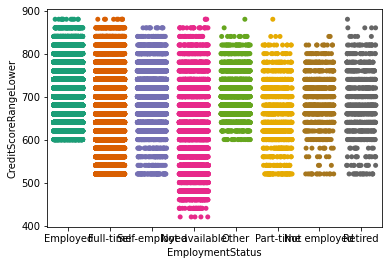

In [90]:
sb.stripplot(data = df, x = 'EmploymentStatus', y = 'CreditScoreRangeLower',
         jitter = 0.35, dodge = True, palette = "Dark2")

The strip plot shows that Employed borrowers had a higher credit score vs the partitime and Not employed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
This correlation coefficient chart shows a moderate negative linear relationship between Borrower Rate and CreditScore. The correlation coeffecient of 0.288 between LoanCurrentDays Delinquent and creditscore shows a weak negative relationship between the two. There was not much relationship established between borrower rate and loan currentdays delinquent.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
No other interesting relationships were observed between number of delinquent days and other variables.

In [91]:
categoric_vars = ['EmploymentStatus', 'ListingCategory_num']
numeric_vars= ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']

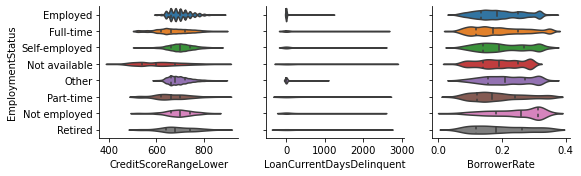

In [92]:
g = sb.PairGrid(data = df, x_vars = ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate'],
                y_vars = ['EmploymentStatus'])
g.map(sb.violinplot, inner = 'quartile')

The pair grid shows that the employed had less days delinquent than the retired, part-time and not employed. The borrower rate ws quite similar for all the employment levels.

Text(0, 0.5, 'LoanCurrentDaysDelinquent')

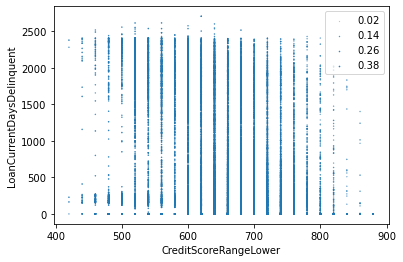

In [93]:
#SIZE
plt.scatter(data = df, x = 'CreditScoreRangeLower', y = 'LoanCurrentDaysDelinquent', s = 'BorrowerRate')

# dummy series for adding legend
sizes = [0.02, 0.14, 0.26,  0.38]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('LoanCurrentDaysDelinquent')


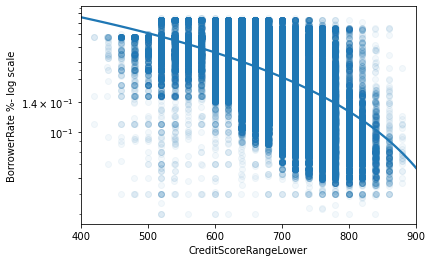

In [94]:
# scatter plot of CreditScoreRangeLower vs. BorrowerRate, with log transform 

sb.regplot(data = df, x = df['CreditScoreRangeLower'], y = df['BorrowerRate'],
           truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlim([400, 900])
plt.xlabel('CreditScoreRangeLower')
plt.yscale('log')
plt.yticks([0.06,0.10, 0.14, 0.18, 0.22, 0.26, 0.30, 0.34, 0.38])
plt.ylabel('BorrowerRate %- log scale')
plt.show()

The scatter plot of CreditScoreRangeLower vs. BorrowerRate, with log transform shows a negative relationship between the two. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.# Multivariate regression

C:\Users\dkona\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


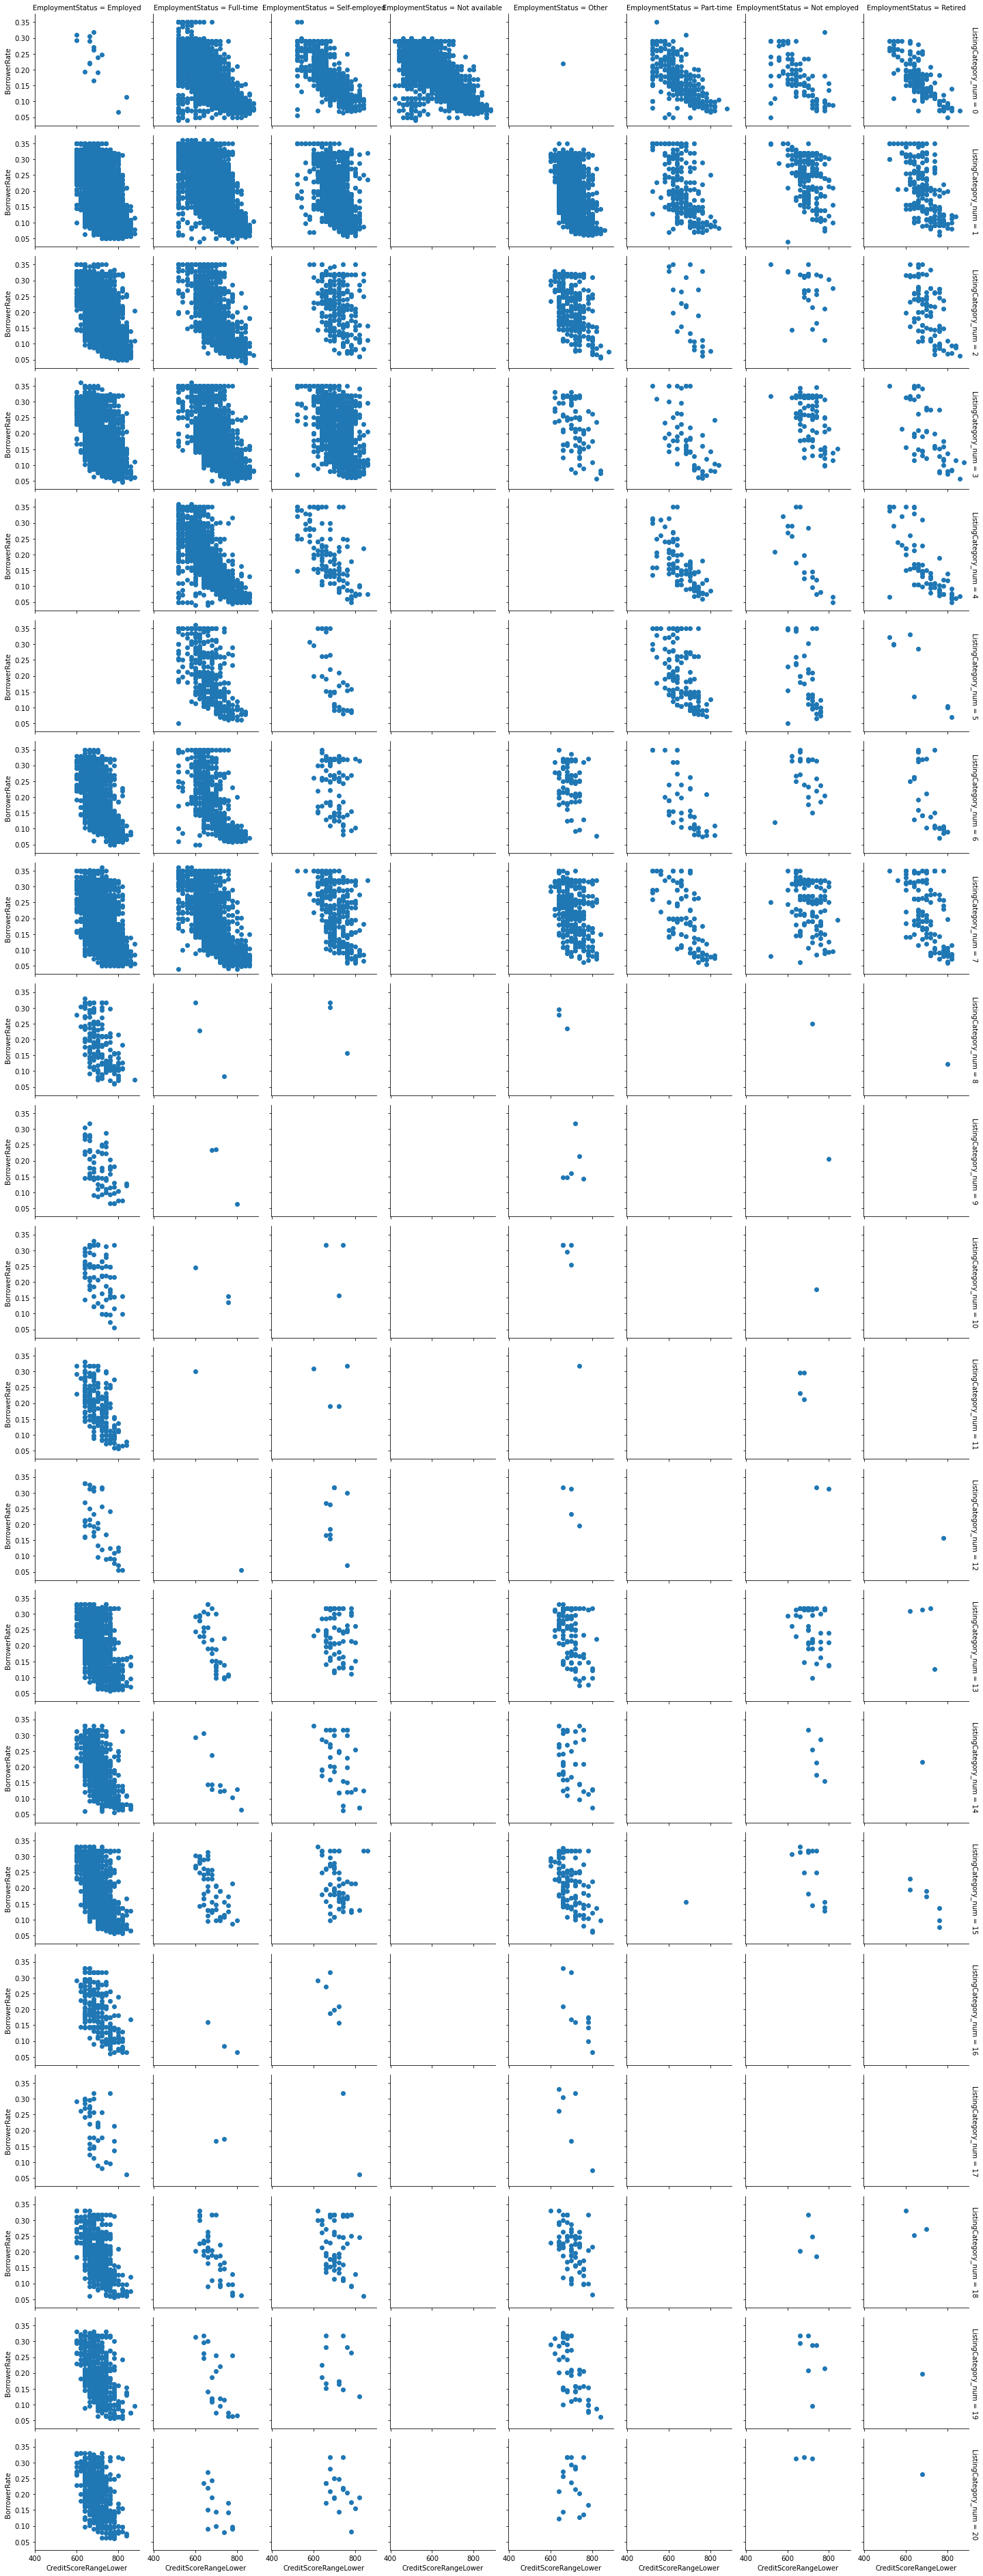

In [95]:
categoric_vars = ['EmploymentStatus', 'ListingCategory_num']
numeric_vars= ['CreditScoreRangeLower', 'LoanCurrentDaysDelinquent', 'BorrowerRate']

g = sb.FacetGrid(data = df, col = 'EmploymentStatus', row = 'ListingCategory_num', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'CreditScoreRangeLower', 'BorrowerRate')

<AxesSubplot:xlabel='EmploymentStatus', ylabel='ListingCategory_num'>

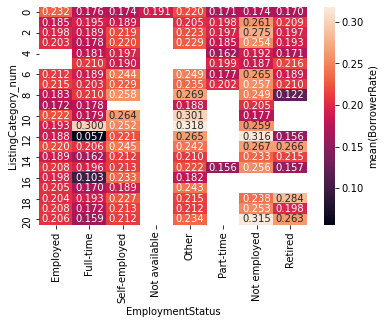

In [99]:
cat_means = df.groupby(['EmploymentStatus', 'ListingCategory_num']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'BorrowerRate_avg')
cat_means = cat_means.pivot(index = 'ListingCategory_num', columns = 'EmploymentStatus',
                            values = 'BorrowerRate_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'})

The multivariate plot above shows that the full-time borrowers with Green loans and Motorcyle have the lowest rate, vs the un-employed with wedding loans and green loans and full time borrowers with engagement ring loans had the highest rate.  Overall the fulltime and employed see to have the lower interest rates compared to the un-employed, regardless of the the listing category.


The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


<AxesSubplot:xlabel='EmploymentStatus', ylabel='ListingCategory_num'>

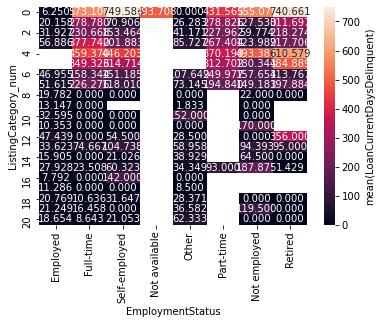

In [97]:
cat_means = df.groupby(['EmploymentStatus', 'ListingCategory_num']).mean()['LoanCurrentDaysDelinquent']
cat_means = cat_means.reset_index(name = 'LoanCurrentDaysDelinquent_avg')
cat_means = cat_means.pivot(index = 'ListingCategory_num', columns = 'EmploymentStatus',
                            values = 'LoanCurrentDaysDelinquent_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LoanCurrentDaysDelinquent)'})

The plot shows that Self-employed borrowers, with debt consolidation loan and retired borrowers with debt consolidation loan had the highest number of delinquent days

<AxesSubplot:xlabel='EmploymentStatus', ylabel='ListingCategory_num'>

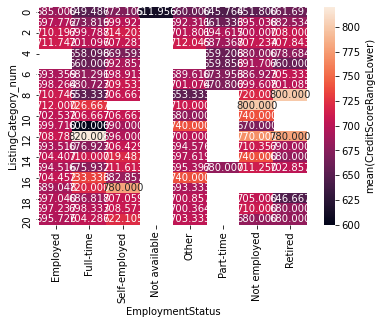

In [98]:
cat_means = df.groupby(['EmploymentStatus', 'ListingCategory_num']).mean()['CreditScoreRangeLower']
cat_means = cat_means.reset_index(name = 'CreditScoreRangeLower_avg')
cat_means = cat_means.pivot(index = 'ListingCategory_num', columns = 'EmploymentStatus',
                            values = 'CreditScoreRangeLower_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(CreditScoreRangeLower)'})

This table shows that full time borrowers with engagement ring loan had the lowest credit score while borrowers with green loans had the highest credit score.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The color gradient in the plots helped us further investigate the type of loans that may affect the interest rate.
### Were there any interesting or surprising interactions between features?

As we expected, better credit score and a better employment status meant better interest rate. It was interesting to find that the type of loan (engagment ring loan) had a high interest rate regardless for full time borrowers.